# **IMPORTING LIBRARIES**


In [ ]:
import pandas as pd


In [ ]:

import numpy as np

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from scipy import interp

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

# **IMPORTING DATASET**



In [ ]:
from google.colab import files
files.upload()

Saving thalassemia_dataset.csv to thalassemia_dataset (4).csv


{'thalassemia_dataset (4).csv': b'Patient ID,Name,Age,Sex,Hb A,Hb F,Hb E,Hb A2,Target_Class\r\n69,Gani,24,Male,94,0,0,6,Normal\r\n70,Mehjabeen,19,Female,97,0,0,3,Normal\r\n71,Sadia,21,Female,96.5,0,0,3.5,Normal\r\n72,Marzia,22,Female,96.9,0,0,3.1,Normal\r\n73,Saikat,25,Male,96.6,0,0,3.4,Normal\r\n74,Sojib,25,Male,96.8,0,0,3.2,Normal\r\n75,Saiful,24,Male,96.8,0,0,3.2,Normal\r\n76,Fhmida,25,Female,96.5,0,0,3.5,Normal\r\n77,Monir,25,Male,93.3,0,0,6.7,Normal\r\n78,Sumi,21,Female,65.3,0,30,4.7,E trait\r\n79,Sabiha,21,Female,96.8,0,0,3.2,Normal\r\n80,Toma,23,Female,97.1,0,0,2.9,Normal\r\n81,Rafi,23,Female,96.7,0,0,3.3,Normal\r\n82,Jannatul,24,Female,96.6,0,0,3.4,Normal\r\n83,Akhi,25,Female,97,0,0,3,Normal\r\n84,Tonu,25,Female,96.7,0,0,3.3,Normal\r\n85,Tangina,25,Female,97,0,0,3,Normal\r\n86,Juthi,25,Female,97.1,0,0,2.9,Normal\r\n87,Saima,20,Female,97.2,0,0,2.8,Normal\r\n88,Jasim,26,Male,96.7,0,0,3.3,Normal\r\n89,Dipti,24,Female,96.5,0,0,3.5,Normal\r\n90,Murad,26,Male,96.7,0,0,3.3,Normal\r\n9

In [ ]:
df = pd.read_csv('thalassemia_dataset.csv')
df.head()

,Patient ID,Name,Age,Sex,Hb A,Hb F,Hb E,Hb A2,Target_Class
0,69,Gani,24,Male,94.0,0.0,0.0,6.0,Normal
1,70,Mehjabeen,19,Female,97.0,0.0,0.0,3.0,Normal
2,71,Sadia,21,Female,96.5,0.0,0.0,3.5,Normal
3,72,Marzia,22,Female,96.9,0.0,0.0,3.1,Normal
4,73,Saikat,25,Male,96.6,0.0,0.0,3.4,Normal


In [ ]:
df.columns

Index(['Patient ID', 'Name', 'Age', 'Sex', 'Hb A', 'Hb F', 'Hb E', 'Hb A2',
       'Target_Class'],
      dtype='object')

In [ ]:
df.tail(10)

,Patient ID,Name,Age,Sex,Hb A,Hb F,Hb E,Hb A2,Target_Class
1723,30,Abdul Basar,45,Male,91.2,3.2,0.0,5.6,Beta trait
1724,14,Mohona,5,Female,96.7,1.0,0.0,2.3,Normal
1725,14,Mohona,5,Female,96.8,0.8,0.0,2.4,Normal
1726,1,Mahmud,27,Male,97.8,0.0,0.0,2.2,Normal
1727,1,Trisha,23,Female,97.1,0.5,0.0,2.4,Normal
1728,2,Sharmin,22,Female,97.4,0.0,0.0,2.6,Normal
1729,1,Ruman,32,Male,97.3,0.0,0.0,2.7,Normal
1730,2,Monjur,47,Male,97.5,0.0,0.0,2.5,Normal
1731,M234,Dolna,25,Female,97.1,0.0,0.0,2.9,Normal
1732,M235,Jahidul,30,Male,71.2,0.0,25.4,3.4,E trait


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient ID    1733 non-null   object 
 1   Name          1733 non-null   object 
 2   Age           1733 non-null   int64  
 3   Sex           1733 non-null   object 
 4   Hb A          1733 non-null   float64
 5   Hb F          1731 non-null   float64
 6   Hb E          1732 non-null   float64
 7   Hb A2         1733 non-null   float64
 8   Target_Class  1733 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 122.0+ KB


In [ ]:
print(df.describe())
print("............................................................................")

               Age         Hb A         Hb F         Hb E        Hb A2
count  1733.000000  1733.000000  1731.000000  1732.000000  1733.000000
mean     23.199077    92.702654     0.252686     3.881351     3.128909
std       5.844715    11.988572     2.227959    10.444572     2.635530
min       1.000000     0.000000     0.000000     0.000000     0.000000
25%      21.000000    96.700000     0.000000     0.000000     2.600000
50%      23.000000    97.100000     0.000000     0.000000     2.900000
75%      25.000000    97.400000     0.000000     0.000000     3.300000
max      65.000000   100.000000    43.100000    92.900000    99.200000
............................................................................


# **NULL VALUES IN DATASET**

In [ ]:
print(df.isna().sum())

Patient ID      0
Name            0
Age             0
Sex             0
Hb A            0
Hb F            2
Hb E            1
Hb A2           0
Target_Class    0
dtype: int64


# **REPLACING NULL VALUES BY '0'**

In [ ]:
df = df.fillna(0)

In [ ]:
print(df.describe())
print("............................................................................")
print(df.isna().sum())

               Age         Hb A         Hb F         Hb E        Hb A2
count  1733.000000  1733.000000  1733.000000  1733.000000  1733.000000
mean     23.199077    92.702654     0.252395     3.879111     3.128909
std       5.844715    11.988572     2.226689    10.441973     2.635530
min       1.000000     0.000000     0.000000     0.000000     0.000000
25%      21.000000    96.700000     0.000000     0.000000     2.600000
50%      23.000000    97.100000     0.000000     0.000000     2.900000
75%      25.000000    97.400000     0.000000     0.000000     3.300000
max      65.000000   100.000000    43.100000    92.900000    99.200000
............................................................................
Patient ID      0
Name            0
Age             0
Sex             0
Hb A            0
Hb F            0
Hb E            0
Hb A2           0
Target_Class    0
dtype: int64


# **TARGET CLASS VALUES**

In [ ]:
df['Target_Class'].value_counts()

Normal              1448
E trait              222
Beta trait            39
Beta Thalassemia       8
D trait                6
E beta                 5
HPFH                   3
Hb E disease           2
Name: Target_Class, dtype: int64

# **REPLACING THE TARGET CLASS WITH NUMERIC VALUES**

In [ ]:
df.head()

,Patient ID,Name,Age,Sex,Hb A,Hb F,Hb E,Hb A2,Target_Class
0,69,Gani,24,Male,94.0,0.0,0.0,6.0,Normal
1,70,Mehjabeen,19,Female,97.0,0.0,0.0,3.0,Normal
2,71,Sadia,21,Female,96.5,0.0,0.0,3.5,Normal
3,72,Marzia,22,Female,96.9,0.0,0.0,3.1,Normal
4,73,Saikat,25,Male,96.6,0.0,0.0,3.4,Normal


# **REPLACING THE TARGET CLASS WITH NUMERIC VALUES**

In [ ]:
test_df = [df]
thalassemiaClassification = {'Normal':0,'E trait':1, 'Beta trait':1, 'Beta Thalassemia':1, 'E beta':1, 'D trait':1 }

for dataset in test_df:
    dataset['Target_Class'] = dataset['Target_Class'].map(thalassemiaClassification)

In [ ]:
dataset.head()

,Patient ID,Name,Age,Sex,Hb A,Hb F,Hb E,Hb A2,Target_Class
0,69,Gani,24,Male,94.0,0.0,0.0,6.0,0.0
1,70,Mehjabeen,19,Female,97.0,0.0,0.0,3.0,0.0
2,71,Sadia,21,Female,96.5,0.0,0.0,3.5,0.0
3,72,Marzia,22,Female,96.9,0.0,0.0,3.1,0.0
4,73,Saikat,25,Male,96.6,0.0,0.0,3.4,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient ID    1733 non-null   object 
 1   Name          1733 non-null   object 
 2   Age           1733 non-null   int64  
 3   Sex           1733 non-null   object 
 4   Hb A          1733 non-null   float64
 5   Hb F          1733 non-null   float64
 6   Hb E          1733 non-null   float64
 7   Hb A2         1733 non-null   float64
 8   Target_Class  1728 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 122.0+ KB


# **DROPPING UNNECESSARY COLUMNS**

In [ ]:
dataset.drop(['Patient ID','Name','Age','Sex'], axis=1, inplace=True)

In [ ]:
dataset.head(10)

,Hb A,Hb F,Hb E,Hb A2,Target_Class
0,94.0,0.0,0.0,6.0,0.0
1,97.0,0.0,0.0,3.0,0.0
2,96.5,0.0,0.0,3.5,0.0
3,96.9,0.0,0.0,3.1,0.0
4,96.6,0.0,0.0,3.4,0.0
5,96.8,0.0,0.0,3.2,0.0
6,96.8,0.0,0.0,3.2,0.0
7,96.5,0.0,0.0,3.5,0.0
8,93.3,0.0,0.0,6.7,0.0
9,65.3,0.0,30.0,4.7,1.0


# **DATA VISUALIZATION BY BAR DIAGRAM**

In [ ]:
def bar_chart(feature):
  normal = df[df['Target_Class']==0][feature].value_counts()
  positive = df[df['Target_Class']==1][feature].value_counts()


  df_new = pd.DataFrame([normal, positive])

  df_new.index = ['Normal', 'Positive']

  df_new.plot(kind='bar', stacked=True, figsize=(10,5))

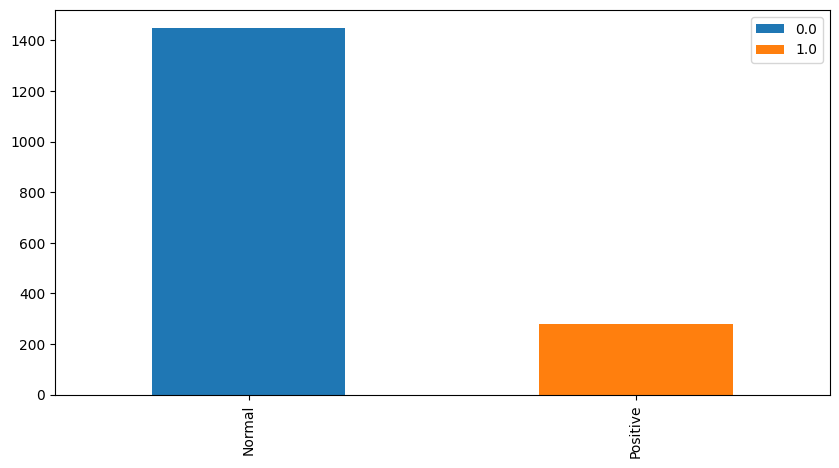

In [ ]:
bar_chart('Target_Class')

In [ ]:
X = dataset.drop('Target_Class', axis='columns')
y = dataset['Target_Class']

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1733 entries, 0 to 1732
Series name: Target_Class
Non-Null Count  Dtype  
--------------  -----  
1728 non-null   float64
dtypes: float64(1)
memory usage: 13.7 KB


In [ ]:
print(y_test.describe())
print("............................................................................")
print(y.isna().sum())

count    518.000000
mean       0.158301
std        0.365376
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Target_Class, dtype: float64
............................................................................
5


In [ ]:
df = y.fillna(0)

In [ ]:

print(df.isna().sum())

0


# **Splitting Train and Test into X and Y**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df, test_size=0.3)


# **MODEL APPLYING**

# **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("Accuracy:",lr.score(X_test, y_test)*100,"%\n")
y_predict = lr.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

Accuracy: 97.11538461538461 %

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       439
         1.0       0.96      0.85      0.90        81

    accuracy                           0.97       520
   macro avg       0.97      0.92      0.94       520
weighted avg       0.97      0.97      0.97       520



# **2. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
print("Accuracy:",svm.score(X_test, y_test)*100,"%\n")
y_predicted = svm.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))

Accuracy: 97.3076923076923 %

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       439
         1.0       0.96      0.86      0.91        81

    accuracy                           0.97       520
   macro avg       0.97      0.93      0.95       520
weighted avg       0.97      0.97      0.97       520



# **3. K-Nearest Neighbors(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Accuracy:",knn.score(X_test, y_test)*100,"%\n")
y_predicted = knn.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))

Accuracy: 98.26923076923076 %

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       439
         1.0       0.90      1.00      0.95        81

    accuracy                           0.98       520
   macro avg       0.95      0.99      0.97       520
weighted avg       0.98      0.98      0.98       520



# **4. Decision Tree**

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy:",dt.score(X_test, y_test)*100,"%\n")
y_predicted = dt.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))

Accuracy: 97.88461538461539 %

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       439
         1.0       0.93      0.94      0.93        81

    accuracy                           0.98       520
   macro avg       0.96      0.96      0.96       520
weighted avg       0.98      0.98      0.98       520



# **5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
print("Accuracy:",rf.score(X_test, y_test)*100,"%\n")
y_predicted = rf.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))

Accuracy: 99.03846153846155 %

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       439
         1.0       0.95      0.99      0.97        81

    accuracy                           0.99       520
   macro avg       0.98      0.99      0.98       520
weighted avg       0.99      0.99      0.99       520



# **ROC CURVE BASED ON MODELS:**



In [ ]:
predictedProba_rf=rf.predict_proba(X_test)
predictedProba_dtc=dt.predict_proba(X_test)
predictedProba_knn=knn.predict_proba(X_test)




In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predictedProba_rf[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictedProba_dtc[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predictedProba_knn[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predictedProba_lr[:,1], pos_label=1)



In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

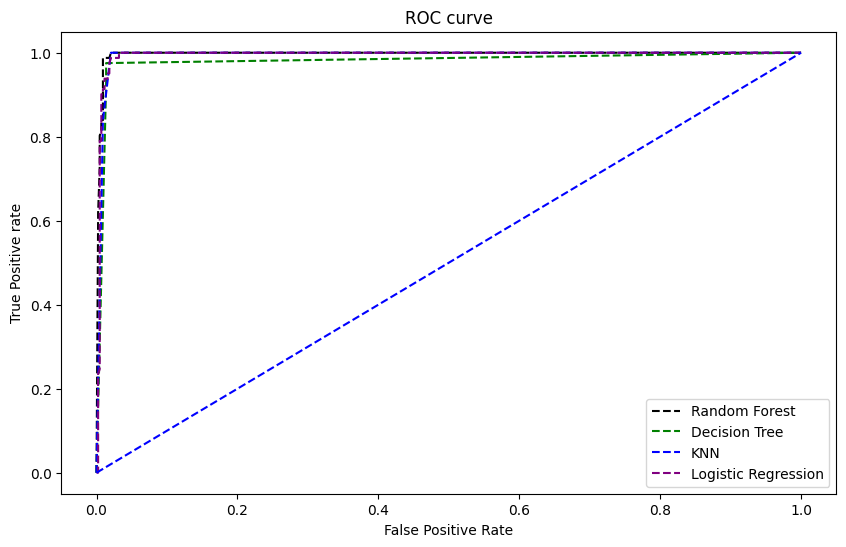

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Logistic Regression')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
def macroAverageCurve(modelName, x):
    n_classes=2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(modelName))[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    plt.figure(figsize=(10,6))
    plt.plot(fpr["macro"], tpr["macro"],label=x,color='green', linestyle=':', linewidth=3)

    plt.plot([0, 1], [0, 1], 'k--',color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-Average')
    plt.legend(loc="lower right")
    plt.show()

# **1.Macro Average Logistic Regration**

<ipython-input-219-a72af846a26a>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-219-a72af846a26a>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',color='red')


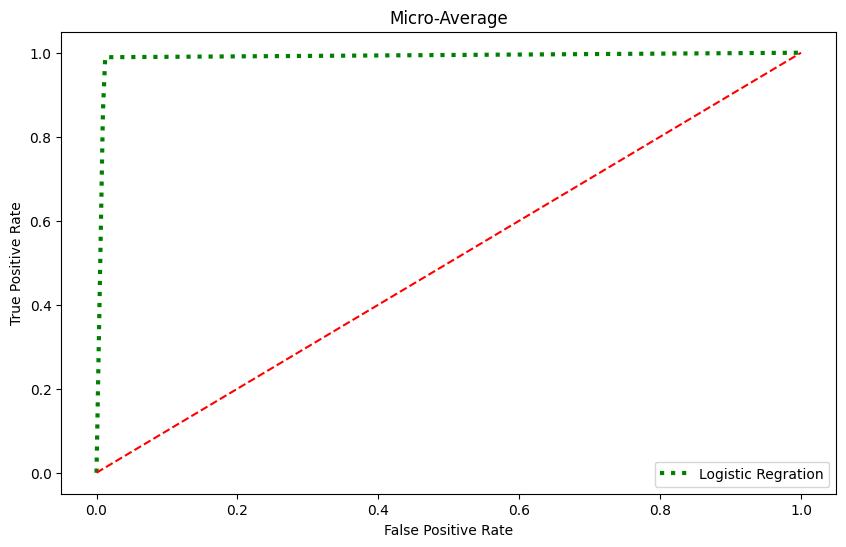

In [ ]:
macroAverageCurve(y_predicted, "Logistic Regration")

# **2.Macro Average SVM**

<ipython-input-219-a72af846a26a>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-219-a72af846a26a>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',color='red')


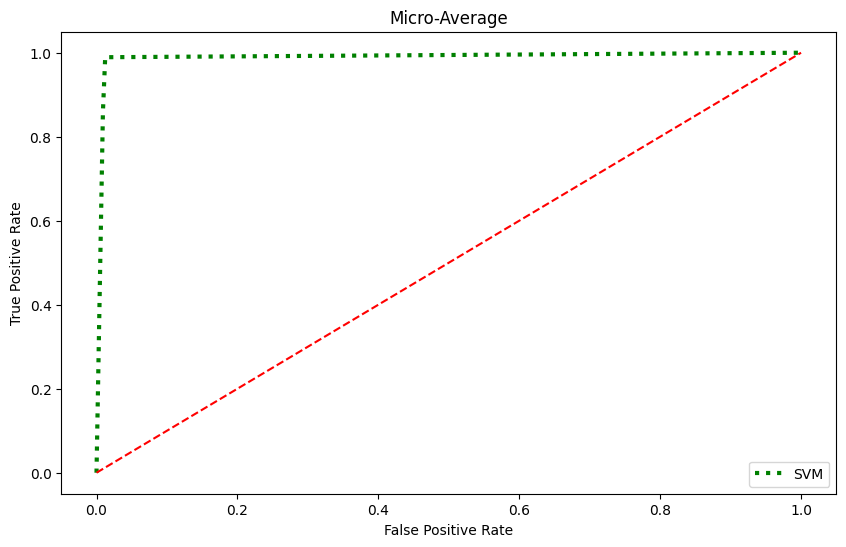

In [ ]:
macroAverageCurve(y_predicted, 'SVM')

# **3.Macro Average KNN**

<ipython-input-219-a72af846a26a>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-219-a72af846a26a>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',color='red')


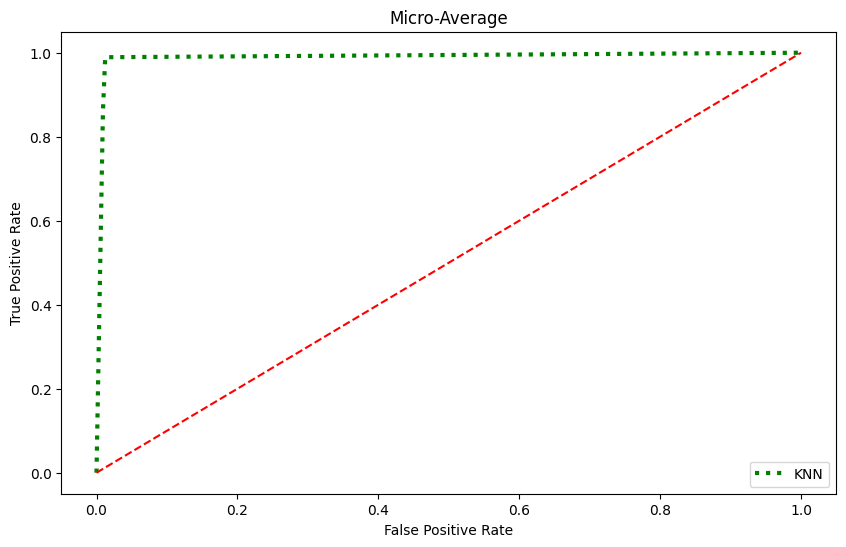

In [ ]:
macroAverageCurve(y_predicted, "KNN")

# **4.Macro Average Decision Tree**

<ipython-input-219-a72af846a26a>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-219-a72af846a26a>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',color='red')


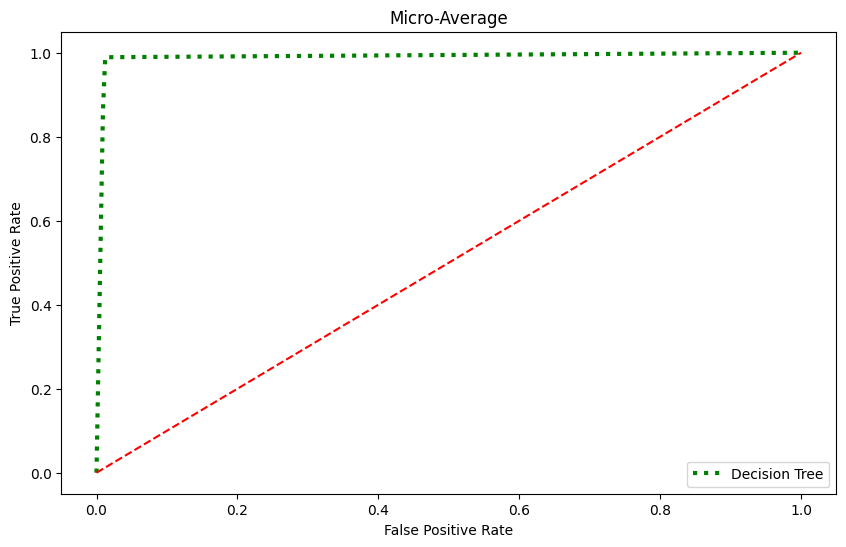

In [ ]:
macroAverageCurve(y_predicted, "Decision Tree")

# **5.Macro Average Random Forest**





<ipython-input-219-a72af846a26a>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-219-a72af846a26a>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',color='red')


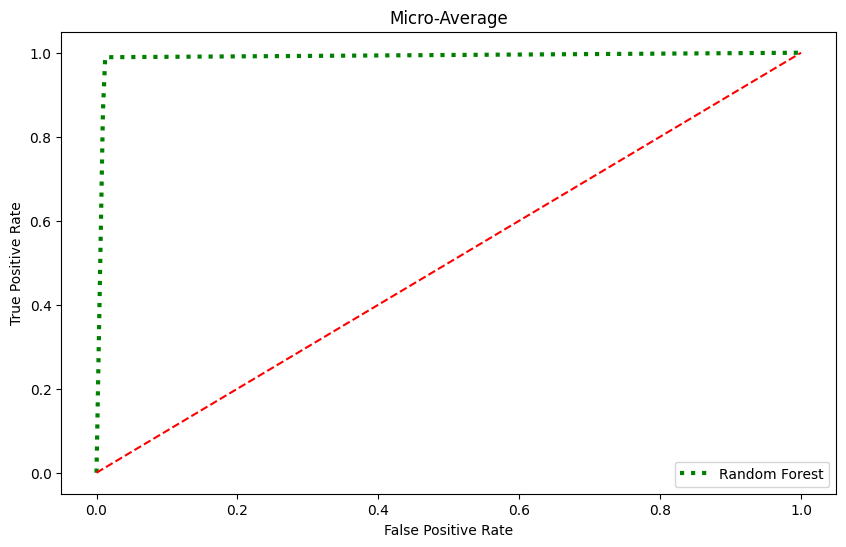

In [ ]:
macroAverageCurve(y_predicted, "Random Forest")